In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_csv('D:\DESKTOP\Cogntive Analytics\Experiments\Datasets\Hitters.csv').dropna().drop('Player', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\wajid\AppData\Local\Temp\ipykernel_30468\2557074708.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\DESKTOP\Cogntive Analytics\Experiments\Datasets\Hitters.csv').dropna().drop('Player', axis = 1)


In [35]:
y = df.Salary
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

In [36]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [37]:
ridge = Ridge()
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 19)

Text(0, 0.5, 'weights')

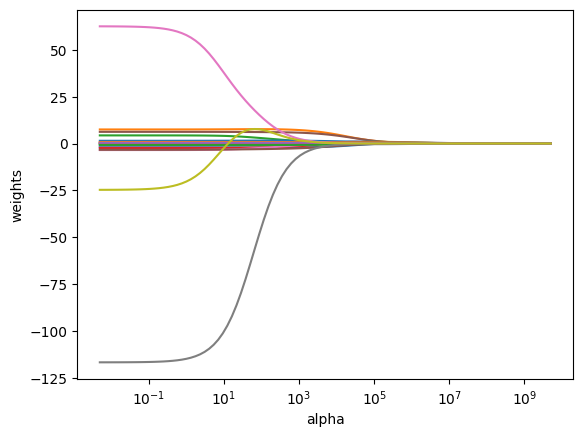

In [38]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [39]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [40]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AtBat           -1.847687
Hits             4.359634
HmRun           -5.277385
Runs            -0.166042
RBI              4.247790
Walks            3.492435
Years            9.174059
CAtBat          -0.595198
CHits            2.140742
CHmRun           2.913484
CRuns            0.271946
CRBI            -0.591043
CWalks           0.171610
PutOuts          0.418292
Assists          0.445158
Errors          -5.507812
League_N        67.441132
Division_W    -100.612196
NewLeague_N    -21.153561
dtype: float64
115325.04539923432


In [41]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3)) # Calculate the test MSE


AtBat          3.610286e-04
Hits           1.285729e-04
HmRun          1.687679e-05
Runs           6.720858e-05
RBI            8.010120e-05
Walks          6.606546e-05
Years          1.078452e-05
CAtBat         6.880730e-03
CHits          2.095391e-03
CHmRun         2.864823e-04
CRuns          1.071697e-03
CRBI           1.189446e-03
CWalks         7.448325e-04
PutOuts        8.437728e-04
Assists       -4.683932e-06
Errors         1.266266e-06
League_N      -7.484549e-08
Division_W    -5.136370e-07
NewLeague_N   -5.969551e-08
dtype: float64
165016.14024085485


In [42]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE

AtBat           -1.821115
Hits             4.259156
HmRun           -4.773401
Runs            -0.038760
RBI              3.984578
Walks            3.470126
Years            9.498236
CAtBat          -0.605129
CHits            2.174979
CHmRun           2.979306
CRuns            0.266356
CRBI            -0.598456
CWalks           0.171383
PutOuts          0.421063
Assists          0.464379
Errors          -6.024576
League_N       133.743163
Division_W    -113.743875
NewLeague_N    -81.927763
dtype: float64
116690.46856661813


In [43]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

378231.66377731453

In [44]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

113938.33161417206

In [45]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat          0.212638
Hits           0.582154
HmRun          0.021942
Runs           0.333584
RBI            0.191530
Walks          0.507784
Years         -0.007532
CAtBat        -0.311717
CHits          0.800669
CHmRun         0.165121
CRuns          0.715549
CRBI           0.567190
CWalks        -0.025906
PutOuts        0.290130
Assists        0.154169
Errors        -0.067756
League_N       0.006936
Division_W    -0.022272
NewLeague_N    0.004730
dtype: float64

Text(0, 0.5, 'weights')

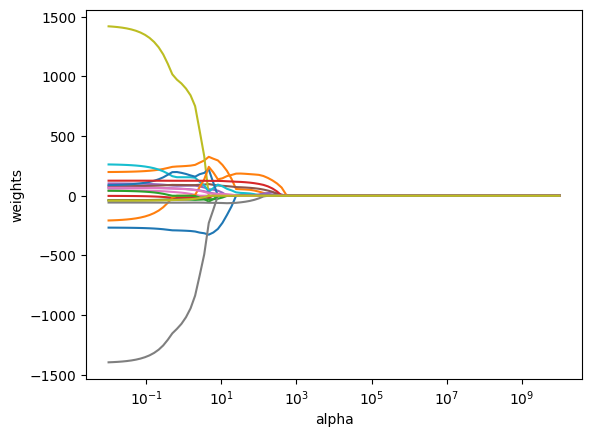

In [46]:
lasso = Lasso(max_iter = 10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [47]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

118255.15053121911

In [48]:
pd.Series(lasso.coef_, index=X.columns)


AtBat          0.186425
Hits           0.000000
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.000000
Years         -0.000000
CAtBat        -0.508102
CHits          1.424662
CHmRun         0.000000
CRuns          0.597670
CRBI           0.548273
CWalks         0.404799
PutOuts        0.456655
Assists        0.048838
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64